# Quickstart: Pandas API on Spark

This is a short introduction to pandas API on Spark, geared mainly for new users. This notebook shows you some key differences between pandas and pandas API on Spark. You can run this examples by yourself in 'Live Notebook: pandas API on Spark' at [the quickstart page](https://spark.apache.org/docs/latest/api/python/getting_started/index.html).

Customarily, we import pandas API on Spark as follows:

In [1]:
spark

NameError: name 'spark' is not defined

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides
# if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
import pyspark.pandas as ps

ModuleNotFoundError: No module named 'pyspark.pandas'

In [4]:
from pyspark.sql import SparkSession

In [4]:
# Local mode
spark = SparkSession\
        .builder\
        .appName("localdemo")\
        .getOrCreate()

In [ ]:
# yarn mode
spark = SparkSession\
        .builder\
        .master("yarn")\
        .config('spark.executor.instances','99')\
        .appName("yarndemo")\
        .getOrCreate()

In [ ]:
# standalone mode
spark = SparkSession\
        .builder\
        .master("spark://master.example.org:7077")\
        .config('spark.cores.max','1')\
        .config('spark.executor.memory','1G')\
        .appName("clusterdemo")\
        .getOrCreate()

In [5]:
# Check spark app name
spark.sparkContext.appName

'PySparkShell'

In [6]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", True)

In [7]:
ps.set_option("compute.default_index_type", "distributed")

In [8]:
spark

## Object Creation



Creating a pandas-on-Spark Series by passing a list of values, letting pandas API on Spark create a default integer index:

In [5]:
# Create a pandas Series
#pser = pd.Series([1, 3, 5, np.nan, 6, 8]) 
s = ps.Series([1, 3, 5, np.nan, 6, 8])

In [6]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a pandas-on-Spark DataFrame by passing a dict of objects that can be converted to series-like.

In [18]:
df = pd.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])
type(df)

pandas.core.frame.DataFrame

In [9]:
psdf = ps.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])
psdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


Creating a pandas DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [10]:
dates = pd.date_range('20130101', periods=6)

In [11]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
pdf

,A,B,C,D
2013-01-01,-0.469665,0.468402,1.487590,0.976017
2013-01-02,-0.494357,-0.364168,-0.210397,0.294112
2013-01-03,0.240481,0.338471,-2.401774,-1.037074
2013-01-04,-1.599554,1.532466,-0.254389,0.393806
2013-01-05,-1.913580,0.667755,0.037268,-0.119658
2013-01-06,-0.851885,0.798011,-1.399014,0.052026


Now, this pandas DataFrame can be converted to a pandas-on-Spark DataFrame

In [15]:
psdf = ps.from_pandas(pdf)

In [16]:
type(psdf)

pyspark.pandas.frame.DataFrame

In [17]:
psdf = ps.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

It looks and behaves the same as a pandas DataFrame.

In [19]:
psdf

,A,B,C,D
2013-01-01,0.077161,-0.600288,1.141473,-1.106277
2013-01-02,1.700158,2.713957,-2.442602,-0.159743
2013-01-03,0.366229,-0.327381,0.119604,-0.459046
2013-01-04,0.488789,-0.572266,-0.077094,1.454062
2013-01-05,0.426479,-0.857734,-0.114316,1.062228
2013-01-06,0.313849,-0.743778,-0.361044,-0.439269


In [20]:
psdf.head(10)

,A,B,C,D
2013-01-01,0.077161,-0.600288,1.141473,-1.106277
2013-01-02,1.700158,2.713957,-2.442602,-0.159743
2013-01-03,0.366229,-0.327381,0.119604,-0.459046
2013-01-04,0.488789,-0.572266,-0.077094,1.454062
2013-01-05,0.426479,-0.857734,-0.114316,1.062228
2013-01-06,0.313849,-0.743778,-0.361044,-0.439269


Also, it is possible to create a pandas-on-Spark DataFrame from Spark DataFrame easily.

Creating a Spark DataFrame from pandas DataFrame

In [20]:
sdf = spark.createDataFrame(pdf)

In [21]:
sdf.show()

+-------------------+-------------------+-------------------+--------------------+
|                  A|                  B|                  C|                   D|
+-------------------+-------------------+-------------------+--------------------+
| 0.1357363452746669|  1.565493721144011|-2.2383295918751323|  0.5614546431298627|
| 0.2107770240876042| 0.2701457731123729| 0.8994511130106475| -1.8701504340119997|
|-0.1023297267762341| 1.5526880177342615|0.37411074767756075|-0.09982782797471662|
|-0.8708277799468355|-1.0014910219448112| 0.9173464043779557|  0.8508514825318294|
|0.12087371639124969| 0.9751503889741479|-0.7202006916677247| -3.7553538114594143|
| 0.8484736195819714|-0.4897822839836168|-1.2386311874567126| 0.19850482762356725|
+-------------------+-------------------+-------------------+--------------------+



Creating pandas-on-Spark DataFrame from Spark DataFrame.

In [22]:
psdf = sdf.to_pandas_on_spark()

In [23]:
psdf

,A,B,C,D
0,0.135736,1.565494,-2.238330,0.561455
1,0.210777,0.270146,0.899451,-1.870150
8589934592,-0.102330,1.552688,0.374111,-0.099828
8589934593,-0.870828,-1.001491,0.917346,0.850851
17179869184,0.120874,0.975150,-0.720201,-3.755354
17179869185,0.848474,-0.489782,-1.238631,0.198505


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes) . Types that are common to both Spark and pandas are currently supported.

In [24]:
psdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

Transposing your data

In [25]:
psdf.T

,0,1,8589934592,8589934593,17179869184,17179869185
A,0.135736,0.210777,-0.102330,-0.870828,0.120874,0.848474
B,1.565494,0.270146,1.552688,-1.001491,0.975150,-0.489782
C,-2.238330,0.899451,0.374111,0.917346,-0.720201,-1.238631
D,0.561455,-1.870150,-0.099828,0.850851,-3.755354,0.198505


## Selection

In [26]:
# Create a pandas DataFrame
pdf = pd.DataFrame({'A': np.random.rand(5),
                    'B': np.random.rand(5)})
# Create a pandas-on-Spark DataFrame by passing a pandas DataFrame
psdf = ps.DataFrame(pdf)
psdf = ps.from_pandas(pdf)
psdf

,A,B
0,0.531560,0.419725
1,0.797717,0.159876
2,0.059167,0.570489
3,0.742356,0.395738
4,0.758942,0.150467


In [9]:
# Create a pandas-on-Spark DataFrame
psdf = ps.DataFrame({'A': np.random.rand(5),
                     'B': np.random.rand(5)})
psdf

,A,B
0,0.541537,0.955161
1,0.403256,0.687594
2,0.487859,0.101897
3,0.905025,0.315576
4,0.281993,0.731522


In [10]:
psdf['A']

0    0.541537
1    0.403256
2    0.487859
3    0.905025
4    0.281993
Name: A, dtype: float64

In [11]:
psdf[['A', 'B']]

,A,B
0,0.541537,0.955161
1,0.403256,0.687594
2,0.487859,0.101897
3,0.905025,0.315576
4,0.281993,0.731522


In [12]:
psdf.loc[1:2]

,A,B
1,0.403256,0.687594
2,0.487859,0.101897


In [13]:
psdf.iloc[:3, 1:2]

,B
0,0.955161
1,0.687594
2,0.101897


In [14]:
psser = ps.Series([100, 200, 300, 400, 500], index=[0, 1, 2, 3, 4])
# The below commented line will fail since pandas-on-Spark disallows adding columns coming from
# different DataFrames or Series to a pandas-on-Spark DataFrame as adding columns requires
# join operations which are generally expensive.
# This operation can be enabled by setting compute.ops_on_diff_frames to True.
# If you want to know about more detail, See the following blog post.
# https://databricks.com/blog/2020/03/31/10-minutes-from-pandas-to-koalas-on-apache-spark.html
#psdf['C'] = psser

In [15]:
# Those are needed for managing options
#from pyspark.pandas.config import set_option, reset_option
ps.set_option("compute.ops_on_diff_frames", True)

psdf['C'] = psser
# Reset to default to avoid potential expensive operation in the future
ps.reset_option("compute.ops_on_diff_frames")

In [16]:
psdf

,A,B,C
0,0.541537,0.955161,100
1,0.403256,0.687594,200
2,0.487859,0.101897,300
3,0.905025,0.315576,400
4,0.281993,0.731522,500


## Applying Python function with pandas-on-Spark object

In [17]:
psdf.apply(np.cumsum)

,A,B,C
0,0.541537,0.955161,100
1,0.944793,1.642755,300
2,1.432651,1.744653,600
3,2.337676,2.060229,1000
4,2.619669,2.791750,1500


In [18]:
psdf.apply(np.cumsum, axis=1)

,A,B,C
0,0.541537,1.496698,101.496698
1,0.403256,1.090850,201.090850
2,0.487859,0.589756,300.589756
3,0.905025,1.220601,401.220601
4,0.281993,1.013514,501.013514


In [37]:
psdf.apply(lambda x: x ** 2)

,A,B,C
0,0.068959,0.687165,10000
1,0.802095,0.125723,40000
2,0.337295,0.434051,90000
3,0.337034,0.415038,160000
4,0.106875,0.794393,250000


In [38]:
def square(x) -> ps.Series[np.float64]:
    return x ** 2

In [39]:
psdf.apply(square)

,A,B,C
0,0.068959,0.687165,10000.0
1,0.802095,0.125723,40000.0
2,0.337295,0.434051,90000.0
3,0.337034,0.415038,160000.0
4,0.106875,0.794393,250000.0


Here is how to show top rows from the frame below.

Note that the data in a Spark dataframe does not preserve the natural order by default. The natural order can be preserved by setting `compute.ordered_head` option but it causes a performance overhead with sorting internally.

In [40]:
psdf = ps.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [41]:
psdf.head()

,A,B,C,D
2013-01-01,0.349752,-0.935959,-0.346600,0.417659
2013-01-02,-0.657400,0.220442,1.312914,-0.204863
2013-01-03,0.019588,-0.844137,0.140879,0.051251
2013-01-04,-0.342876,-0.474096,-0.699184,1.205051
2013-01-05,0.298118,-0.560345,0.714827,0.779907


Displaying the index, columns, and the underlying numpy data.

In [42]:
psdf.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq=None)

In [43]:
psdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [44]:
psdf.to_numpy()

array([[ 0.34975153, -0.93595908, -0.34660023,  0.41765928],
       [-0.65739953,  0.22044233,  1.31291375, -0.20486332],
       [ 0.01958769, -0.84413666,  0.14087939,  0.05125135],
       [-0.3428757 , -0.47409596, -0.69918436,  1.20505109],
       [ 0.29811832, -0.5603454 ,  0.71482706,  0.77990658],
       [-0.80212741,  2.02624741, -0.15118351, -0.98472044]])

Showing a quick statistic summary of your data

In [45]:
psdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.189158,-0.094641,0.161942,0.210714
std,0.487862,1.116053,0.738791,0.772361
min,-0.802127,-0.935959,-0.699184,-0.984720
25%,-0.657400,-0.844137,-0.346600,-0.204863
50%,-0.342876,-0.560345,-0.151184,0.051251
75%,0.298118,0.220442,0.714827,0.779907
max,0.349752,2.026247,1.312914,1.205051


Sorting by its index

In [46]:
psdf.sort_index(ascending=False)

,A,B,C,D
2013-01-06,-0.802127,2.026247,-0.151184,-0.984720
2013-01-05,0.298118,-0.560345,0.714827,0.779907
2013-01-04,-0.342876,-0.474096,-0.699184,1.205051
2013-01-03,0.019588,-0.844137,0.140879,0.051251
2013-01-02,-0.657400,0.220442,1.312914,-0.204863
2013-01-01,0.349752,-0.935959,-0.346600,0.417659


Sorting by value

In [47]:
psdf.sort_values(by='B')

,A,B,C,D
2013-01-01,0.349752,-0.935959,-0.346600,0.417659
2013-01-03,0.019588,-0.844137,0.140879,0.051251
2013-01-05,0.298118,-0.560345,0.714827,0.779907
2013-01-04,-0.342876,-0.474096,-0.699184,1.205051
2013-01-02,-0.657400,0.220442,1.312914,-0.204863
2013-01-06,-0.802127,2.026247,-0.151184,-0.984720


## Missing Data
Pandas API on Spark primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. 


In [48]:
psdf

,A,B,C,D
2013-01-01,0.349752,-0.935959,-0.346600,0.417659
2013-01-02,-0.657400,0.220442,1.312914,-0.204863
2013-01-03,0.019588,-0.844137,0.140879,0.051251
2013-01-04,-0.342876,-0.474096,-0.699184,1.205051
2013-01-05,0.298118,-0.560345,0.714827,0.779907
2013-01-06,-0.802127,2.026247,-0.151184,-0.984720


In [49]:
#pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])
psdf1 = psdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [50]:
#pdf1.loc[dates[0]:dates[1], 'E'] = 1
psdf1.loc[dates[0]:dates[1], 'E'] = 1

In [51]:
#psdf1 = ps.from_pandas(pdf1)
psdf1

,A,B,E
2013-01-01,0.349752,-0.935959,1.0
2013-01-02,-0.657400,0.220442,1.0
2013-01-03,0.019588,-0.844137,NaN
2013-01-04,-0.342876,-0.474096,NaN


To drop any rows that have missing data.

In [52]:
psdf1.dropna(how='any')

,A,B,E
2013-01-01,0.349752,-0.935959,1.0
2013-01-02,-0.657400,0.220442,1.0


Filling missing data.

In [53]:
psdf1.fillna(value=5)

,A,B,E
2013-01-01,0.349752,-0.935959,1.0
2013-01-02,-0.657400,0.220442,1.0
2013-01-03,0.019588,-0.844137,5.0
2013-01-04,-0.342876,-0.474096,5.0


## Operations

### Stats
Performing a descriptive statistic:

In [54]:
psdf.mean()

A   -0.189158
B   -0.094641
C    0.161942
D    0.210714
dtype: float64

### Spark Configurations

Various configurations in PySpark could be applied internally in pandas API on Spark.
For example, you can enable Arrow optimization to hugely speed up internal pandas conversion. See also <a href="https://spark.apache.org/docs/latest/sql-pyspark-pandas-with-arrow.html">PySpark Usage Guide for Pandas with Apache Arrow</a> in PySpark documentation.

In [55]:
ps.get_option("compute.default_index_type")  # Use default index prevent overhead.

'distributed'

In [56]:
spark.conf.get("spark.sql.execution.arrow.pyspark.enabled")  # Keep its default value.

'true'

In [57]:
#import warnings
#warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [58]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", False)
%timeit ps.range(300000).to_pandas()

742 ms ± 97.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", True)
%timeit ps.range(300000).to_pandas()

136 ms ± 42.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [60]:
#ps.reset_option("compute.default_index_type")
#spark.conf.set("spark.sql.execution.arrow.enabled", False)  # Set its default value back.

## Grouping
By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [61]:
psdf = ps.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [62]:
psdf

,A,B,C,D
0,foo,one,0.527930,0.289626
1,bar,one,-0.220420,0.299682
2,foo,two,1.625290,0.740388
3,bar,three,0.435066,0.255904
4,foo,two,2.210385,1.882304
5,bar,two,-0.986084,1.253433
6,foo,one,1.710163,1.705348
7,foo,three,-2.311502,0.617846


Grouping and then applying the [sum()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.groupby.GroupBy.sum.html) function to the resulting groups.

In [63]:
psdf.groupby('A').sum()

,C,D
A,,
bar,-0.771438,1.809020
foo,3.762266,5.235512


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [64]:
psdf.groupby(['A', 'B']).sum()

C         D
A   B                        
foo one    2.238093  1.994974
bar one   -0.220420  0.299682
foo two    3.835675  2.622691
bar three  0.435066  0.255904
    two   -0.986084  1.253433
foo three -2.311502  0.617846

In [65]:
psdf.groupby('A').filter(lambda x: x['C'].mean() > 0)

,A,B,C,D
0,foo,one,0.527930,0.289626
2,foo,two,1.625290,0.740388
4,foo,two,2.210385,1.882304
6,foo,one,1.710163,1.705348
7,foo,three,-2.311502,0.617846


## Plotting

In [13]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [14]:
psser = ps.Series(pser)

In [15]:
psser = psser.cummax()

22/02/12 08:05:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/02/12 08:05:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/02/12 08:05:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


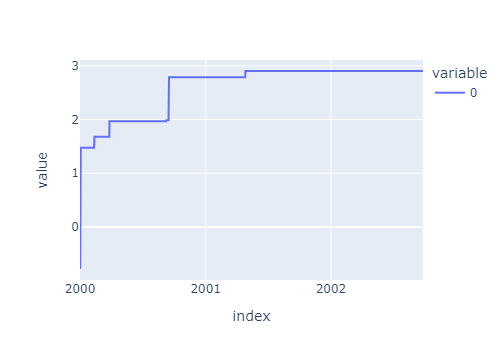

In [16]:
psser.plot()

On a DataFrame, the [plot()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.plot.html) method is a convenience to plot all of the columns with labels:

In [17]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [18]:
psdf = ps.from_pandas(pdf)

In [19]:
psdf = psdf.cummax()

22/02/12 08:05:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/02/12 08:05:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/02/12 08:05:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


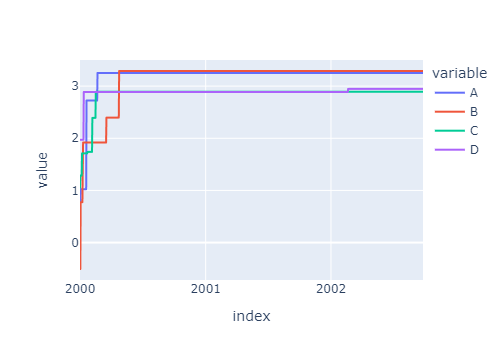

In [20]:
psdf.plot()

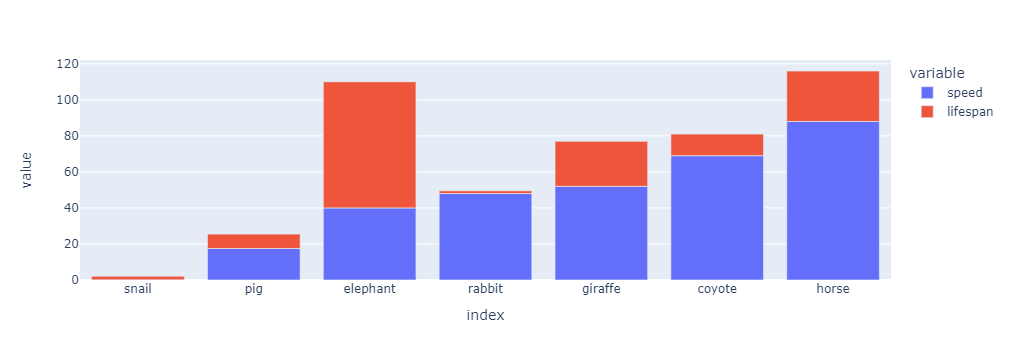

In [74]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
psdf = ps.DataFrame({'speed': speed,
                     'lifespan': lifespan}, index=index)
psdf.plot.bar()

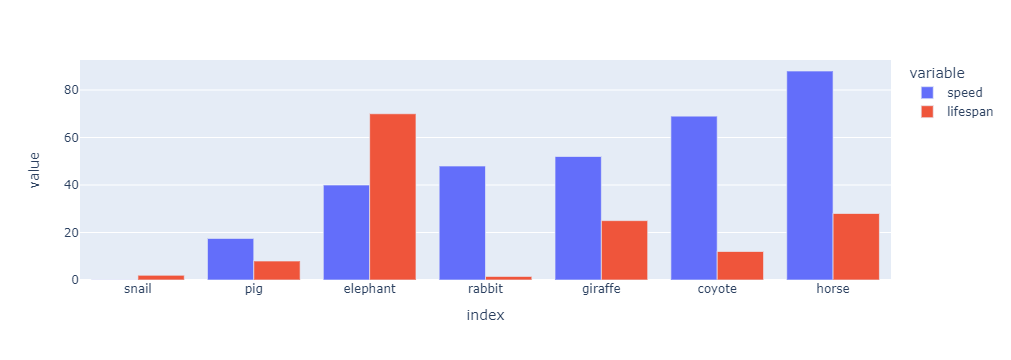

In [75]:
psdf.plot.bar(barmode='group')

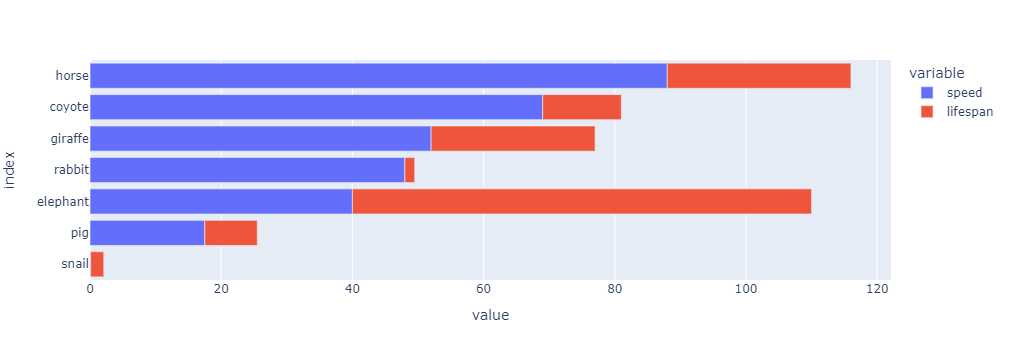

In [76]:
psdf.plot.barh()

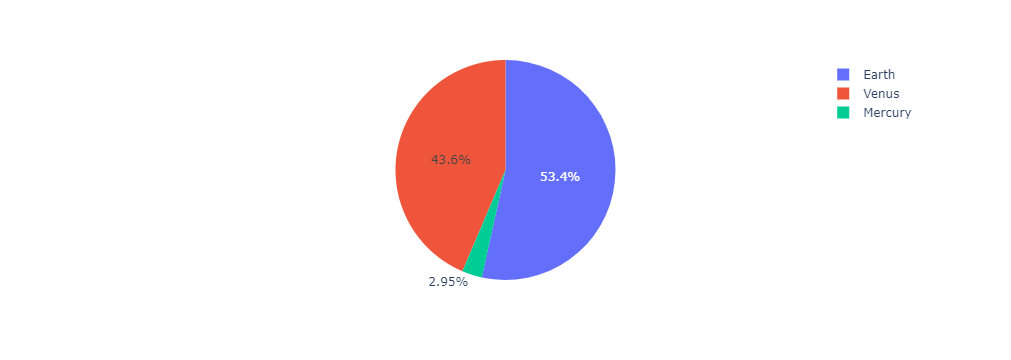

In [77]:
psdf = ps.DataFrame({'mass': [0.330, 4.87, 5.97],
                     'radius': [2439.7, 6051.8, 6378.1]},
                    index=['Mercury', 'Venus', 'Earth'])
psdf.plot.pie(y='mass')

In [78]:
raw_data = {'class_name': ['AIEN', 'BDSE', 'AIOT', 'SESE'],
        'Q1': [28, 24, 32, 18],
        'Q2': [25, 36, 20, 16],
        'Q3': [30, 34, 25, 23]}
cdf = ps.DataFrame(raw_data)
cdf

,class_name,Q1,Q2,Q3
0,AIEN,28,25,30
1,BDSE,24,36,34
2,AIOT,32,20,25
3,SESE,18,16,23


In [79]:
# Create a column with the total amount for each class
cdf['amt'] = cdf['Q1'] + cdf['Q2'] + cdf['Q3']
cdf[['class_name','amt']]

,class_name,amt
0,AIEN,83
1,BDSE,94
2,AIOT,77
3,SESE,57


/usr/local/lib/python3.8/dist-packages/numpy/core/numeric.py:2446: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



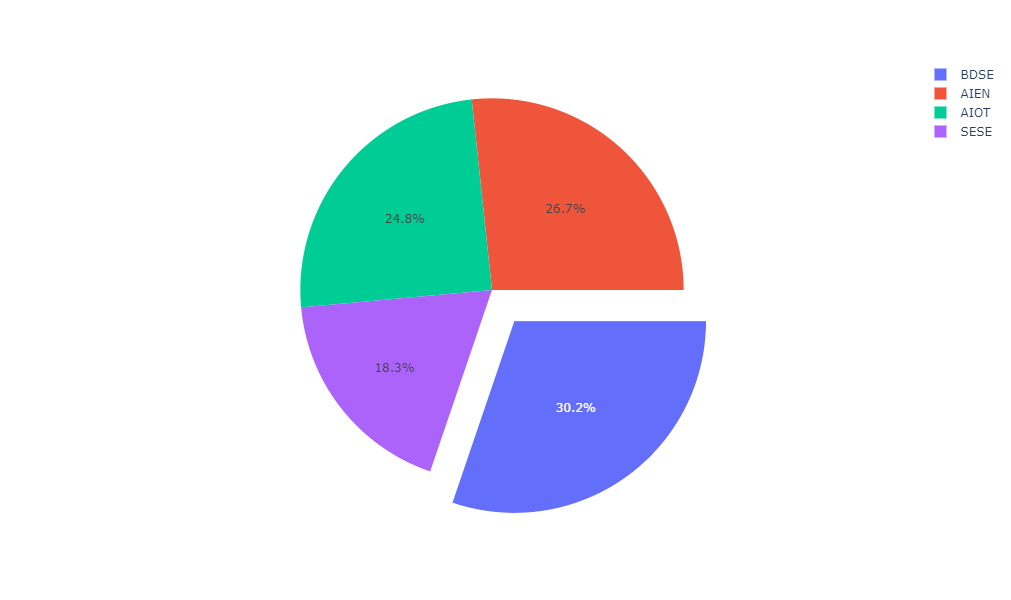

In [80]:
# Create pie chart
fig = cdf['amt'].plot.pie(width=600, height=600)
    
fig.update_traces(
    # with the class name labels 
    labels=cdf['class_name'].to_list(),
    # rotate pie to specific degree
    rotation=90,
    # with one slide pulled out
    pull=[0, 0.2, 0, 0],
    # with the percent listed as a fraction
    #texttemplate='%{percent:.1%f}'
    )

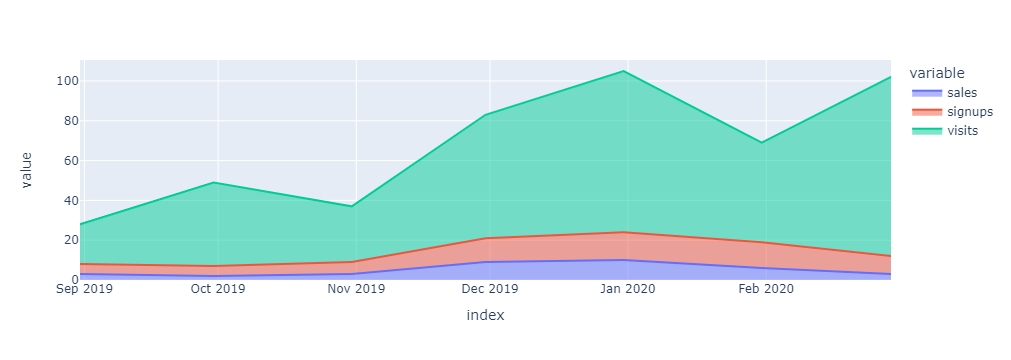

In [81]:
psdf = ps.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6, 3],
    'signups': [5, 5, 6, 12, 14, 13, 9],
    'visits': [20, 42, 28, 62, 81, 50, 90],
}, index=pd.date_range(start='2019/08/15', end='2020/03/09',
                       freq='M'))
psdf.plot.area()

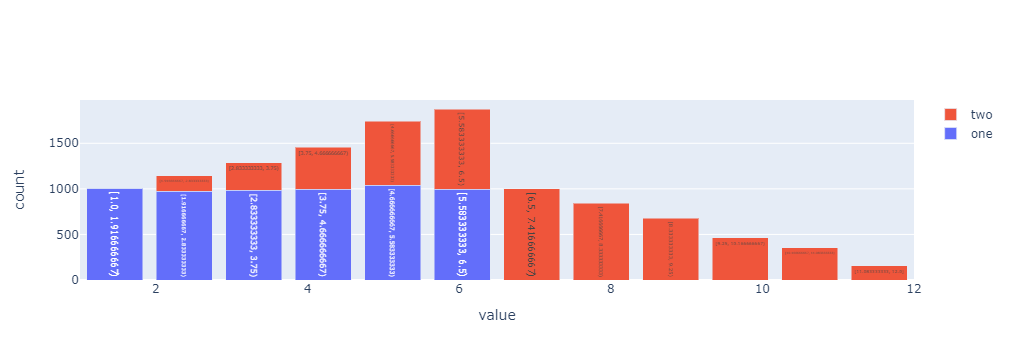

In [82]:
pdf = pd.DataFrame(
    np.random.randint(1, 7, 6000),
    columns=['one'])
pdf['two'] = pdf['one'] + np.random.randint(1, 7, 6000)
psdf = ps.from_pandas(pdf)
psdf.plot.hist(bins=12, alpha=0.5)

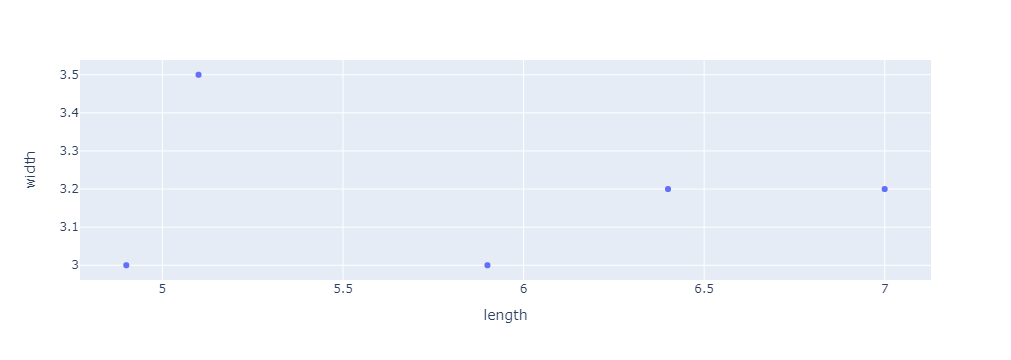

In [83]:
psdf = ps.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                    [6.4, 3.2, 1], [5.9, 3.0, 2]],
                   columns=['length', 'width', 'species'])
psdf.plot.scatter(x='length',
                  y='width',
                  c='species')

For more details, [Plotting](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/frame.html#plotting) documentation.

## Using SQL in pandas API on Spark

In [84]:
psdf = ps.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                     'pig': [20, 18, 489, 675, 1776],
                     'horse': [4, 25, 281, 600, 1900]})

In [85]:
ps.sql("SELECT * FROM {psdf} WHERE pig > 100")

,year,pig,horse
8589934592,2003,489,281
8589934593,2009,675,600
17179869184,2014,1776,1900


In [86]:
pdf = pd.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'sheep': [22, 50, 121, 445, 791],
                    'chicken': [250, 326, 589, 1241, 2118]})

In [87]:
ps.sql('''
    SELECT ps.pig, pd.chicken
    FROM {psdf} ps INNER JOIN {pdf} pd
    ON ps.year = pd.year
    ORDER BY ps.pig, pd.chicken''')

,pig,chicken
0,18,326
1,20,250
2,489,589
3,675,1241
4,1776,2118


In [88]:
with ps.option_context(
        "compute.ops_on_diff_frames", True,
        "compute.default_index_type", 'distributed'):
    df = ps.range(10) + ps.range(10)
    df.spark.explain()

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- Project [CASE WHEN isnotnull(__this___index_level_0__#3022L) THEN __this___index_level_0__#3022L ELSE __that___index_level_0__#3030L END AS __index_level_0__#3035L, (__this_id#3023L + __that_id#3031L) AS id#3065L]
   +- SortMergeJoin [__this___index_level_0__#3022L], [__that___index_level_0__#3030L], FullOuter
      :- Sort [__this___index_level_0__#3022L ASC NULLS FIRST], false, 0
      :  +- Exchange hashpartitioning(__this___index_level_0__#3022L, 200), ENSURE_REQUIREMENTS, [id=#2608]
      :     +- Project [__index_level_0__#2999L AS __this___index_level_0__#3022L, id#2997L AS __this_id#3023L]
      :        +- Project [monotonically_increasing_id() AS __index_level_0__#2999L, id#2997L]
      :           +- Range (0, 10, step=1, splits=4)
      +- Sort [__that___index_level_0__#3030L ASC NULLS FIRST], false, 0
         +- Exchange hashpartitioning(__that___index_level_0__#3030L, 200), ENSURE_REQUIREMENTS, [id=#2609]
       

In [89]:
with ps.option_context(
        "compute.ops_on_diff_frames", False,
        "compute.default_index_type", 'distributed'):
    df = ps.range(10)
    df = df + df
    df.spark.explain()

== Physical Plan ==
*(1) Project [__index_level_0__#3070L, (id#3068L + id#3068L) AS id#3082L]
+- *(1) Project [monotonically_increasing_id() AS __index_level_0__#3070L, id#3068L]
   +- *(1) Range (0, 10, step=1, splits=4)




## Getting data in/out

In [91]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2010', periods=1000))

In [92]:
psdf = ps.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

### CSV

CSV is straightforward and easy to use. See [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.to_csv.html) to write a CSV file and [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.read_csv.html) to read a CSV file.

In [93]:
psdf.shape

(1000, 4)

In [96]:
psdf.to_csv('/home/hadoop/foo.csv')
ps.read_csv('/home/hadoop/foo.csv').head(10)

,A,B,C,D
0,-1.230446,-1.827015,-0.482157,0.583755
1,-1.041659,-0.225024,0.013458,-0.279823
2,0.477682,-0.755610,-0.385681,-2.631527
3,-0.881949,-1.480738,1.974205,1.185849
4,0.562516,-0.816949,0.228927,-0.730215
5,2.811567,1.195675,-0.308800,0.476441
6,-1.377330,-1.447382,-0.888654,2.096384
7,-0.693649,1.579851,1.295039,1.003421
8,1.360532,-1.561743,-0.055550,-0.248323
9,1.275067,-1.596361,0.005584,0.818502


### Parquet

Parquet is an efficient and compact file format to read and write faster. See [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.to_paruqet.html) to write a Parquet file and [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.read_parquet.html) to read a Parquet file.

In [97]:
psdf.to_parquet('/home/hadoop/bar.parquet')
ps.read_parquet('/home/hadoop/bar.parquet').head(10)

,A,B,C,D
0,-1.230446,-1.827015,-0.482157,0.583755
1,-1.041659,-0.225024,0.013458,-0.279823
2,0.477682,-0.755610,-0.385681,-2.631527
3,-0.881949,-1.480738,1.974205,1.185849
4,0.562516,-0.816949,0.228927,-0.730215
5,2.811567,1.195675,-0.308800,0.476441
6,-1.377330,-1.447382,-0.888654,2.096384
7,-0.693649,1.579851,1.295039,1.003421
8,1.360532,-1.561743,-0.055550,-0.248323
9,1.275067,-1.596361,0.005584,0.818502


### Spark IO

In addition, pandas API on Spark fully supports Spark's various datasources such as ORC and an external datasource.  See [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.to_orc.html) to write it to the specified datasource and [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.read_orc.html) to read it from the datasource.

In [99]:
psdf.spark.to_spark_io('/home/hadoop/zoo.orc', format="orc")
ps.read_spark_io('/home/hadoop/zoo.orc', format="orc").head(10)

,A,B,C,D
0,-0.736164,-0.088573,-0.172221,-0.855632
1,0.127830,-2.182977,1.425769,0.287324
2,0.492283,1.082936,1.122524,-0.996024
3,0.026404,0.573477,0.040074,1.174817
4,0.406104,-0.660026,-1.493399,-1.168571
5,-0.075239,-0.079443,0.625619,-0.898650
6,0.972939,-1.567373,0.518753,-1.068886
7,0.977185,1.157898,1.095441,-0.713788
8,-0.695813,-0.529334,-0.458186,-2.979208
9,1.553927,-0.311546,-0.268525,0.461734


See the [Input/Output](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/io.html) documentation for more details.